# Implementing the Gradient Descent Algorithm

In this notebook, you'll be implementing the functions that build the gradient descent algorithm, namely:

* `sigmoid`: The sigmoid activation function.
* `output_formula`: The formula for the prediction.
* `error_formula`: The formula for the error at a point.
* `update_weights`: The function that updates the parameters with one gradient descent step.

Your goal is to find the boundary on a small dataset that has two classes:

![auaghsga](points.png "test")

After you implement the gradient descent functions, be sure to run the `train` function. This will graph several of the lines that are drawn in successive gradient descent steps. It will also graph the error function, and you'll be able to see it decreasing as the number of epochs grows.

First, we'll start with some functions that will help us plot and visualize the data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Some helper functions for plotting and drawing lines


def plot_points(X, y):
    admitted = X[np.argwhere(y == 1)]
    rejected = X[np.argwhere(y == 0)]
    plt.scatter(
        [s[0][0] for s in rejected],
        [s[0][1] for s in rejected],
        s=25,
        color="blue",
        edgecolor="k",
    )
    plt.scatter(
        [s[0][0] for s in admitted],
        [s[0][1] for s in admitted],
        s=25,
        color="red",
        edgecolor="k",
    )


def display(m, b, color="g--"):
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m * x + b, color)

## Reading and plotting the data

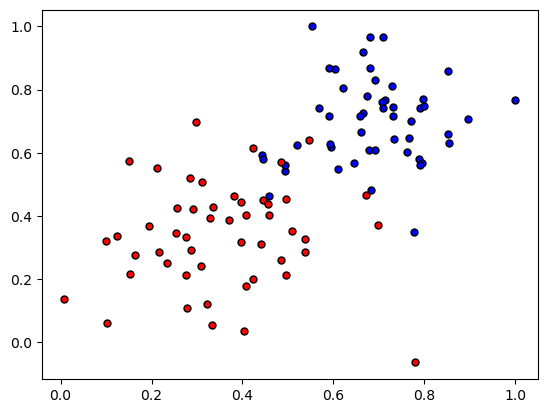

In [2]:
data = pd.read_csv("data.csv", header=None)
X = np.array(data[[0, 1]])
y = np.array(data[2])
plot_points(X, y)
plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [43]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(features @ weights + bias)


# Error (log-loss) formula
def error_formula(y, output):
    return -y * np.log(output) - (1 - y) * np.log(1 - output)


# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    y_hat = output_formula(features=x, weights=weights, bias=bias)
    delta = y - y_hat
    weights = weights + learnrate * delta * x
    bias = bias + learnrate * delta
    return weights, bias

## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [10]:
np.random.seed(44)

epochs = 100
learnrate = 0.01


def train(features, targets, epochs, learnrate, graph_lines=False):
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**0.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)

        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e, "==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0] / weights[1], -bias / weights[1])

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0] / weights[1], -bias / weights[1], "black")

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel("Number of epochs")
    plt.ylabel("Error")
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  0.7043780150257064
Accuracy:  0.31

========== Epoch 10 ==========
Train loss:  0.6163340057066821
Accuracy:  0.55

========== Epoch 20 ==========
Train loss:  0.5501372859896251
Accuracy:  0.73

========== Epoch 30 ==========
Train loss:  0.498041840009345
Accuracy:  0.85

========== Epoch 40 ==========
Train loss:  0.4566542222224499
Accuracy:  0.91

========== Epoch 50 ==========
Train loss:  0.4232418346203117
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3958344279540957
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.37301562763453466
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.3537585207488984
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.33730889845434375
Accuracy:  0.93


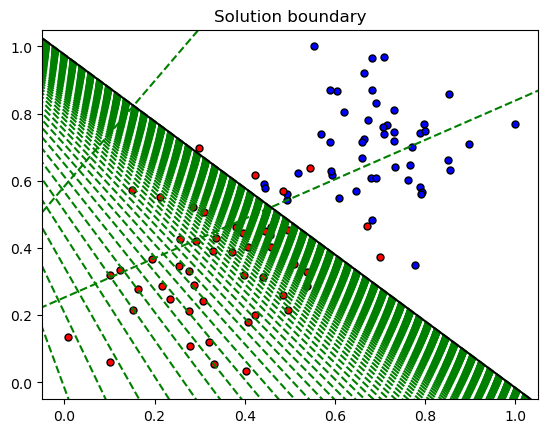

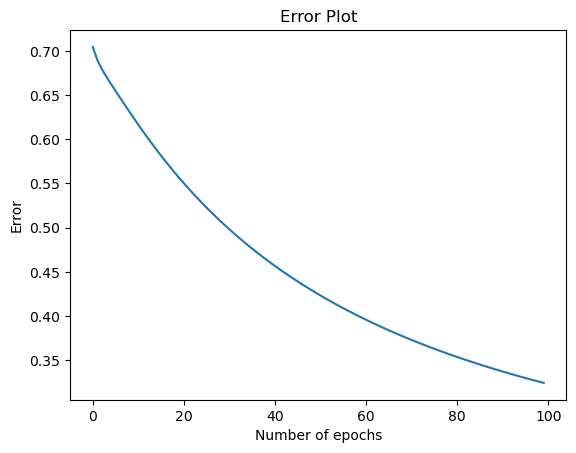

In [48]:
train(X, y, epochs, learnrate, True)

In [17]:
X.shape

(100, 2)

In [25]:
features = X
n_records, n_features = features.shape
weights = np.random.normal(scale=1 / n_features**0.5, size=n_features)
bias = 0

In [22]:
weights.shape

(2,)

In [26]:
X @ weights + bias

array([1.02192672, 0.39624049, 0.54620051, 0.41030459, 0.69113313,
       0.37188464, 0.38237983, 0.59765591, 0.46768103, 0.32366564,
       0.01956423, 0.18403693, 0.36345288, 0.62845947, 0.61345009,
       0.56735579, 0.66471729, 0.42050702, 0.5494146 , 0.4573041 ,
       0.56039799, 0.43964157, 0.68052945, 0.15224706, 0.94193437,
       0.43438094, 0.2339686 , 0.23310195, 0.44060859, 0.72408548,
       0.27918001, 0.5315742 , 0.31407419, 0.67206412, 0.35627269,
       0.30329607, 0.9104683 , 0.53005371, 0.72792262, 0.65347929,
       0.51159729, 0.75626296, 0.42998955, 0.59306186, 0.13772702,
       0.21391956, 0.62590338, 0.40672812, 0.37636636, 0.54218944,
       0.78916864, 0.61858716, 1.16046884, 0.84798372, 0.92687247,
       1.3619332 , 1.0095471 , 0.93386844, 1.07123331, 0.98649507,
       0.68260147, 1.08397703, 0.93024602, 0.91791091, 1.07871985,
       0.97709733, 0.81931554, 0.68364176, 1.043041  , 1.09630126,
       0.99149463, 0.94691683, 0.92986501, 0.90841072, 0.88394

In [45]:
y_hat = output_formula(X, weights, bias)

In [46]:
def error_formula(y, output):
    return -y * np.log(output) - (1 - y) * np.log(1 - output)

In [47]:
error_formula(y, y_hat)

array([0.30741179, 0.51452569, 0.45688425, 0.50889264, 0.40613691,
       0.52439343, 0.52012378, 0.43831919, 0.48640176, 0.54435253,
       0.68341291, 0.60535645, 0.5278429 , 0.42749591, 0.43274266,
       0.44917751, 0.41503183, 0.50483598, 0.4557067 , 0.49041135,
       0.45170076, 0.49729488, 0.40968873, 0.61991825, 0.32921234,
       0.49935943, 0.58298999, 0.58337295, 0.49691609, 0.39525832,
       0.56326838, 0.46227328, 0.54839006, 0.4125423 , 0.5307939 ,
       0.5529539 , 0.33813925, 0.46283635, 0.39400714, 0.41886334,
       0.46971432, 0.38486599, 0.5010879 , 0.43995195, 0.62665289,
       0.59189673, 0.42838581, 0.51032061, 0.52256693, 0.45835717,
       1.16363987, 1.04952832, 1.43304177, 1.20445296, 1.26033276,
       1.58999669, 1.32025012, 1.26534992, 1.36583073, 1.30340676,
       1.09159419, 1.37533805, 1.26275086, 1.2539205 , 1.37141225,
       1.29657024, 1.1844677 , 1.09228539, 1.34490808, 1.38456159,
       1.30705089, 1.27473404, 1.26247764, 1.24714073, 1.22976

In [37]:
weights @ features

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 2)

In [40]:
features[0] @ weights

1.0219267150687392

In [42]:
weights @ features.T

array([1.02192672, 0.39624049, 0.54620051, 0.41030459, 0.69113313,
       0.37188464, 0.38237983, 0.59765591, 0.46768103, 0.32366564,
       0.01956423, 0.18403693, 0.36345288, 0.62845947, 0.61345009,
       0.56735579, 0.66471729, 0.42050702, 0.5494146 , 0.4573041 ,
       0.56039799, 0.43964157, 0.68052945, 0.15224706, 0.94193437,
       0.43438094, 0.2339686 , 0.23310195, 0.44060859, 0.72408548,
       0.27918001, 0.5315742 , 0.31407419, 0.67206412, 0.35627269,
       0.30329607, 0.9104683 , 0.53005371, 0.72792262, 0.65347929,
       0.51159729, 0.75626296, 0.42998955, 0.59306186, 0.13772702,
       0.21391956, 0.62590338, 0.40672812, 0.37636636, 0.54218944,
       0.78916864, 0.61858716, 1.16046884, 0.84798372, 0.92687247,
       1.3619332 , 1.0095471 , 0.93386844, 1.07123331, 0.98649507,
       0.68260147, 1.08397703, 0.93024602, 0.91791091, 1.07871985,
       0.97709733, 0.81931554, 0.68364176, 1.043041  , 1.09630126,
       0.99149463, 0.94691683, 0.92986501, 0.90841072, 0.88394

In [30]:
X.shape

(100, 2)

In [32]:
weights.shape

(2,)